# Maskinlæring

In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Les dataene
# ...

### Utforsking og opprydding av datasettet
La oss undersøke dataene og rydde litt, dersom vi trenger det.

In [1]:
# Skriv ut de fem første linjene
# ...

Vi ser at det ikke er alle kategoriene vi trenger. Siden vi er interessert i hvem som overlevde, og hvorfor, kan det også være lurt å sjekke hvor mange dette var. Du kan beregne sum og antall av et dataframe-element ved å bruke metodene .sum() og .count() på elementet (f.eks. titanic['age'].sum()).

In [2]:
# Sjekk hvor mange som overlevde
# ...

In [4]:
# Slett kategorier du mener er irrelevante for overlevelse
# ...

Vi kan også undersøke manglende verdier og eventuelt sette inn representative verdier der det mangler.

In [214]:
# Printer ut antall manglende verdier i kolonnene
print(titanic.isna().sum())

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
class         0
alive         0
alone         0
dtype: int64


In [215]:
# Fyller inn manglende alder med gjennomsnittet
gjennomsnitt = titanic['age'].mean()
titanic['age'].fillna(gjennomsnitt, inplace = True)

- I hvilke sammenhenger kan det være legitimt å gjøre som ovenfor? Var det legitimt i denne sammenhengen?

## Visualiseringer
La oss først se hvilken effekt klasse og kjønn hadde på overlevelsessjansene:

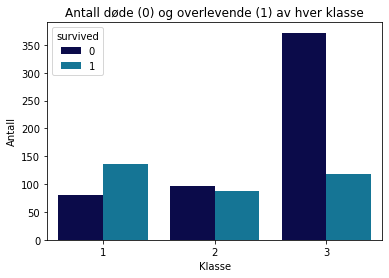

In [216]:
# Passasjerklasse
sns.countplot(x='pclass', hue='survived', data=titanic, palette='ocean')
plt.title("Antall døde (0) og overlevende (1) av hver klasse")
plt.xlabel("Klasse")
plt.ylabel("Antall")
plt.show()

In [3]:
# Lag et tilsvarende plott som viser hvilken effekt kjønn hadde på overlevelsessjansene.

Vi ser, ikke overraskende, at menn på 3. klasse hadde særdeles dårlige odds. Vi har alderen til passasjerene, men ikke alderskategorier. Lag alderskategorier for barn og voksen, og lag en ny kolonne kalt "aldersklasse".

In [ ]:
# Sortere etter alder
aldersklasse = []

for alder in titanic['age']:
    ### fyll inn kode her.
    
titanic['aldersklasse'] = aldersklasse

# Plott effekten aldersklasse har på overlevelse

## Maskinlæring
Vi skal nå lage en modell som kan forutsi hvorvidt en person overlever på Titanic eller ikke, gitt data om personen. Vi velger ut hvilke data vi ønsker å bruke som kriterium for overlevelse, og spesifiserer kategorien "survived" som målkategorien vår:

In [220]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
kriterier = titanic[[# Legg inn kriterier (kolonnekategorier) for overlevelse her]]
kategorier = # legg inn kategori her

I maskinlæring er det viktig at modellen vår klarer å forutsi data som kommer utenfra datasettet vi trener modellen med. Derfor deler vi ofte opp dataene i et treningssett og et testsett. Treningssettet bruker vi til å trene modellen, testsettet til å teste og evaluere modellen i etterkant. Vi blander ikke disse dataene. Vi kan generere slike data med funksjonen _train\_test\_split()_. Her bruker vi 80 \% av dataene til trening og 20 \% til testing. Du bør bruke minst 70 \% av dataene dine til trening.

In [222]:
testandel = 0.2 # Andel brukt til testing
ml_data = train_test_split(kriterier, kategorier, test_size=testandel, random_state=42)

treningskriterier = ml_data[0]
testkriterier = ml_data[1]
treningskategorier = ml_data[2]
testkategorier = ml_data[3]

- Forklar hva funksjonen train\_test\_split gjør ut fra programmet ovenfor.
- Hva er poenget med separate treningskriterier og testkriterier?

Nå kan vi lage modellen vår. Vi bruker en algoritme som heter _Decision Tree Classifier_. Det er basert på sammensatte og forgreinede valgtrær, der alle kombinasjoner av kriterier blir utforsket. Betingede sannsynligheter for ulike hendelser blir beregnet, og de mest sannsynlige utfallene blir framhevet basert på kombinasjonen av kriteriene. Først trener vi modellen:

In [225]:
modell = tree.DecisionTreeClassifier()
modell.fit(treningskriterier, treningskategorier)

DecisionTreeClassifier()

Det var det - da har vi en modell! Den ligger nå i et objekt som vi har kalt _modell_. Vi kan få innsyn i hvordan modellen ser ut, men det kan fort bli litt uoversiktlig og teknisk. La oss først nøye oss med å sjekke hvordan modellen takler testsettet vårt.

- Forklar med ord hva du tror modellen gjør når den "trener".

## Test og validering av modellen

La oss nå bruke modellen for å forutsi hvem som overlever og hvem som ikke gjør det:

In [226]:
modellkategorier_forutsett = modell.predict(testkriterier)
accuracy_score(testkategorier, modellkategorier_forutsett)

0.7597765363128491

Dette betyr at modellen forutsier riktig ca. 76 % av gangene. Det er en ok modell. For å få bedre oversikt over hva modellen forutsier riktig og hva den feiler på, kan vi konstruere en såkalt "Confusion Matrix" (forvirringsmatrise/feilmatrise):

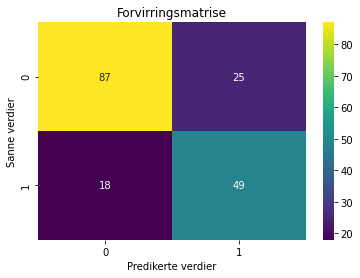

In [227]:
cm = confusion_matrix(modellkategorier_forutsett, testkategorier)

import seaborn as sns
sns.heatmap(cm, annot=True, cmap='viridis')
plt.title("Forvirringsmatrise")
plt.xlabel("Predikerte verdier")
plt.ylabel("Sanne verdier")
plt.show()

- Hva forteller diagrammet ovenfor oss?

Vi kan benytte disse dataene til å beregne hvor stor prosentandel av overlevende og døde som modellen klarte å forutsi korrekt.

In [6]:
# Beregn andelen korrekt forventet død og korrekt forventet overlevelse.

- Sammenlikn størrelsen på disse andelene. Hva er eventuelt årsaken til at det er en forskjell på dem?

La oss helt til sist visualisere modellen vår. Vi velger maks dybde på modellen til 2 for at vi ikke skal få alt for mange forgreininger.

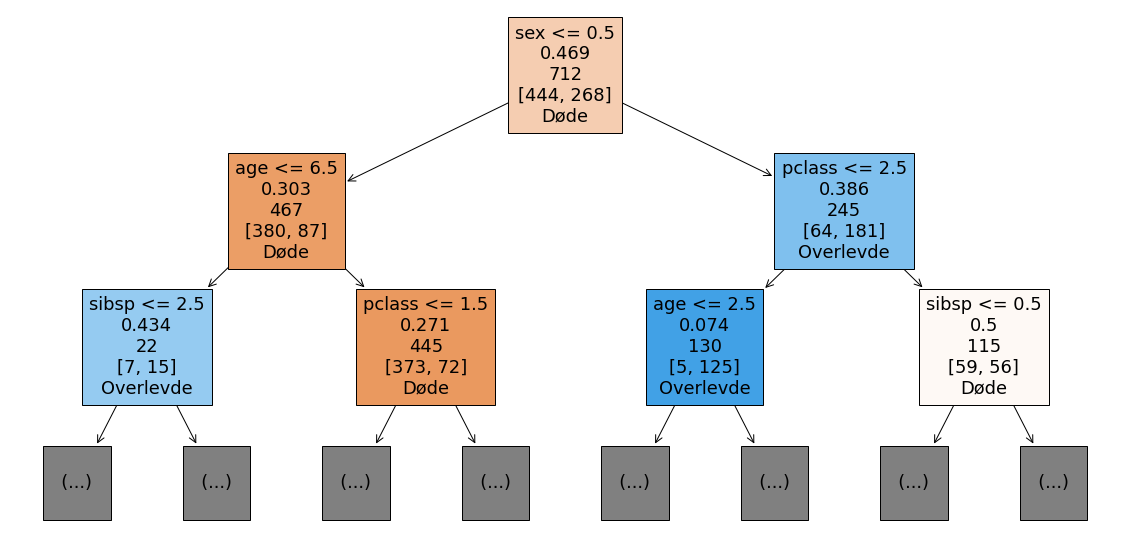

In [229]:
plt.figure(figsize=(20,10))
titanic.pop('survived')
tree.plot_tree(modell, max_depth=2, feature_names=titanic.columns, class_names=['Døde', 'Overlevde'], filled=True, label=None,) 
None

- Bruk visualiseringen av modellen ovenfor til å forklare hvordan modellen vår fungerer.

# Lagre og åpne modellen vår
Vi kan også lagre modellen vår, slik at vi kan bruke den seinere:

In [ ]:
filnavn = "titanicmodell.sav"
joblib.dump(modell, filnavn)

modell = joblib.load(filnavn)